In [26]:
import numpy as np
from matplotlib import pyplot as plt


def RK_4(x, y, h, f):   # Метод Рунге-Кутта 4-го порядка
    k_1 = f(x, y)
    k_2 = f(x + h / 2, y + k_1 * h / 2)
    k_3 = f(x + h / 2, y + k_2 * h / 2)
    k_4 = f(x + h, y + k_3 * h)

    return y + h  * (k_1 + 2 * k_2 + 2 * k_3 + k_4)


def A_4(x, y, h, f):   # Метод Адамса 4-го порядка
    
    return y[3] + h * (55/24 * f(x[3], y[3]) - 59/24 * f(x[2], y[2]) + 37/24 * f(x[1], y[1]) - 3/8 * f(x[0], y[0]))
    

def Bruss(t, v, A=1, B=1.9):   # Модель Лефера-Пригожина "брюсселятор"
    x = v[0][0]
    y = v[1][0]

    new_x = A + x * x * y - (B + 1) * y
    new_y = B * x - x * x * y

    return np.array([[new_x], [new_y]])

h = 1e-3

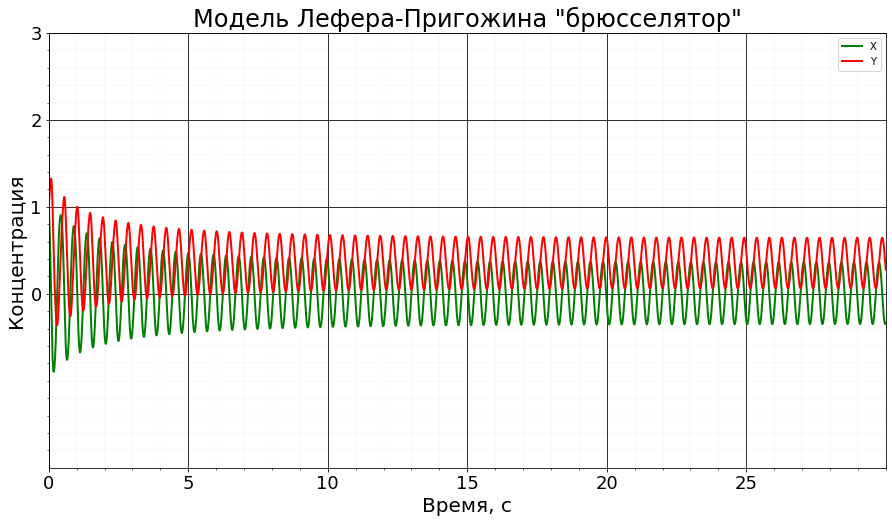

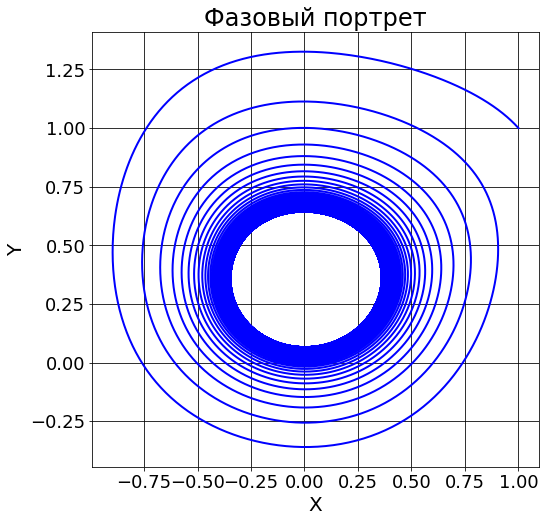

In [37]:
solution = [np.array([[1.0], [1.0]])]
t = [0.0]

for i in range(0, 40000): 
    new_point = RK_4(t[i], solution[i], h, Bruss)
    solution.append(new_point)
    t.append(h * (i + 1))
    

xs = []
ys = []
for elem in solution:
    xs.append(elem[0][0])
    ys.append(elem[1][0])

fig, ax = plt.subplots(figsize=[15, 8])

plt.plot(t, xs, color='green',  linewidth=2, label='X')
plt.plot(t, ys, color='red', linewidth=2, label='Y')

plt.title('Модель Лефера-Пригожина "брюсселятор"', fontsize=24)
plt.xlabel('Время, с', fontsize=20)
plt.ylabel('Концентрация', fontsize=20)

plt.xlim([0, 30])
plt.ylim([-2,3])

plt.ticklabel_format(style='plain')
plt.xticks(np.arange(0, 30, step=5), fontsize=18)
plt.yticks(np.arange(0, 4, step=1), fontsize=18)

plt.minorticks_on()
plt.grid(which='major', color='black', linestyle='-')
plt.grid(which='minor', color='0.65', linestyle='--', linewidth=0.1)

plt.legend()

fig, ax = plt.subplots(figsize=[8, 8])

plt.plot(xs, ys, color='blue', linewidth=2)
plt.ticklabel_format(style='plain')

plt.title('Фазовый портрет', fontsize=24)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(which='major', color='black', linestyle='-')
plt.grid(which='minor', color='0.65', linestyle='--', linewidth=0.1)
plt.show()

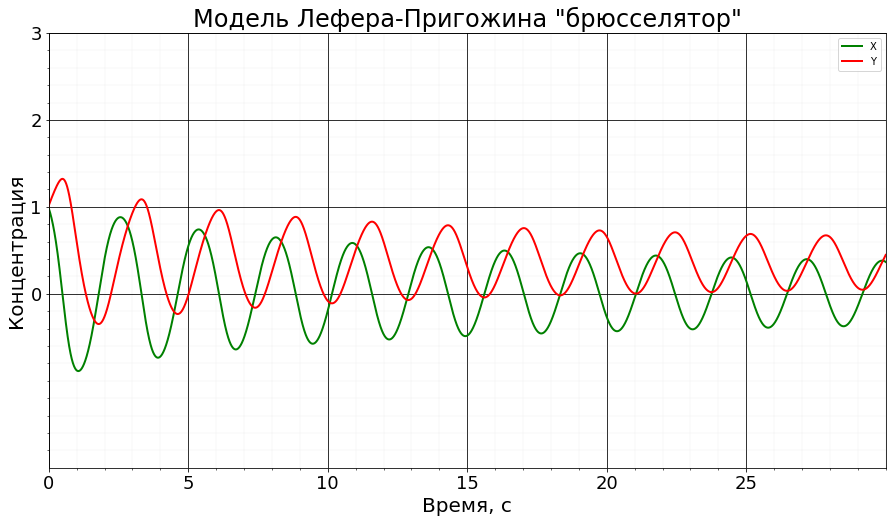

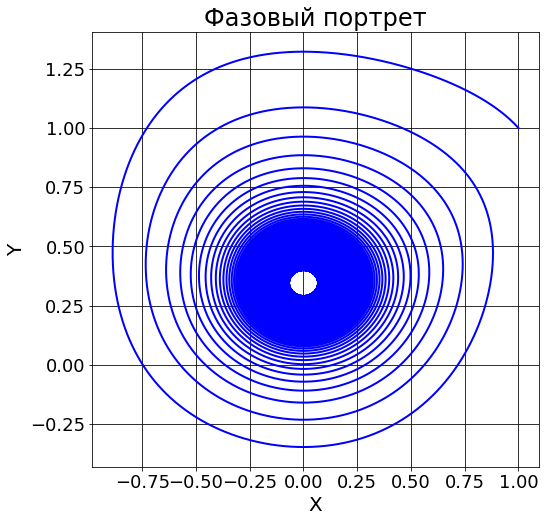

In [42]:
solution = [np.array([[1.0], [1.0]])]
t = [0.0]

for i in range(0, 1000000):    
    if i < 3:
        new_point = RK_4(t[i], solution[i], h, Bruss)
    else:
        old_x = [t[i - 3], t[i - 2], t[i - 1], t[i]]
        old_y = [solution[i - 3], solution[i - 2], solution[i - 1], solution[i]]

        new_point = A_4(old_x, old_y, h, Bruss)

    solution.append(new_point)
    t.append(h * (i + 1))

xs = []
ys = []
for elem in solution:
    xs.append(elem[0][0])
    ys.append(elem[1][0])

fig, ax = plt.subplots(figsize=[15, 8])

plt.plot(t, xs, color='green',  linewidth=2, label='X')
plt.plot(t, ys, color='red', linewidth=2, label='Y')

plt.title('Модель Лефера-Пригожина "брюсселятор"', fontsize=24)
plt.xlabel('Время, с', fontsize=20)
plt.ylabel('Концентрация', fontsize=20)

plt.xlim([0, 30])
plt.ylim([-2, 3])

plt.ticklabel_format(style='plain')
plt.xticks(np.arange(0, 30, step=5), fontsize=18)
plt.yticks(np.arange(0, 4, step=1), fontsize=18)

plt.minorticks_on()
plt.grid(which='major', color='black', linestyle='-')
plt.grid(which='minor', color='0.65', linestyle='--', linewidth=0.1)

plt.legend()

fig, ax = plt.subplots(figsize=[8, 8])

plt.plot(xs, ys, color='blue', linewidth=2)
plt.ticklabel_format(style='plain')

plt.title('Фазовый портрет', fontsize=24)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(which='major', color='black', linestyle='-')
plt.grid(which='minor', color='0.65', linestyle='--', linewidth=0.1)
plt.show()

# Не удалось получить предельные циклы и бифуркацию Хопфа(при которой преедельный цикл вырождается в точку)